In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.utils import shuffle
from sklearn import linear_model
from matplotlib import pyplot
import pickle
from matplotlib import style


df = pd.read_csv('student-mat.csv', sep=";")
df = df[["G1", "G2", "G3", "studytime", "failures", "absences"]]
df.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [9]:
predict = "G3"
x = np.array(df.drop([predict], 1))
y = np.array(df[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.1)



best_score = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.1)

    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best_score:
        best_score = acc
        print("Accuracy:",acc)
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)




print("Coefficient:\n",linear.coef_)
print("Intercept:\n",linear.intercept_)

Accuracy: 0.8625775202843395
Accuracy: 0.9268806606948619
Accuracy: 0.9571161629054799
Coefficient:
 [ 0.1709952   0.96509302 -0.20834619 -0.33753863  0.03952141]
Intercept:
 -1.541595774254569


In [10]:
picklefile = open("studentmodel.pickle", "rb")
linear = pickle.load(picklefile)
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x] )

9.720313529259503 [10 10  1  0  2] 10
12.007782055794928 [12 12  1  0  2] 11
9.26624514095517 [ 8 10  2  0  4] 10
12.536003132760955 [14 13  4  0  0] 14
3.5912657310817373 [6 5 2 1 0] 0
6.327946343594377 [7 7 1 0 3] 8
12.886430467572211 [13 13  3  0  7] 14
8.520241918588365 [ 8  8  1  0 30] 8
13.987040540394927 [15 14  3  0  2] 15
6.600462566338864 [ 7  8  2  3 10] 10
12.848501761003364 [12 13  2  0  4] 13
14.449686101313228 [15 14  2  0  8] 14
3.8496814851067214 [5 5 2 0 4] 6
10.63870444274396 [10 11  2  0  6] 11
6.973581130543598 [8 8 3 0 2] 10
10.939905205664909 [13 11  3  0  8] 11
15.36040673975288 [16 15  2  0  2] 15
4.3645961251041205 [ 6  5  1  1 14] 5
16.35308717277554 [16 16  2  0  2] 16
7.7375365250451775 [7 9 3 0 0] 8
10.707798478406012 [12 11  2  0  0] 12
13.835079812580709 [15 14  4  0  4] 14
12.693159344451324 [12 13  2  0  0] 14
8.42461853817757 [9 9 2 0 4] 10
9.413010384893242 [10 10  2  0  0] 10
5.14446957861949 [7 6 2 0 4] 6
14.98062787098675 [14 15  2  0  0] 15
18.52

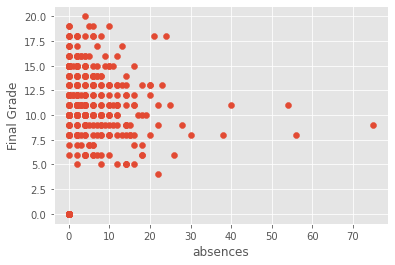

In [11]:
P = "absences"
style.use("ggplot")
pyplot.scatter(df[P], df[predict])
pyplot.xlabel(P)
pyplot.ylabel("Final Grade")
pyplot.show()